### 插值  
求过一组已知点的近似函数  
[scipy.interpolate官方文档](https://docs.scipy.org/doc/scipy/reference/interpolate.html)
#### 插值法定理：  
$$\begin{gathered}
\text{设有}n+1\text{个互不相同的节点}(x_i,y_i)\quad(i=0,1,2,...,n)\text{则存在唯一的多项式}\mathrm{:} \\
\varphi_n\left(x\right)=a_0+a_1x+a_2x^2+...+a_nx^n\text{,使得 }\varphi_n\left(x_j\right)=y_j\quad(j{=}0,1,2,...n). 
\end{gathered}$$

* 分段线性插值法  
将两个相邻的节点依次用直线连接起来,那么形成的一条折线就是分段线性插值函数,记作$I_n(x)$，它满足$I_n(x_i)=y_i$，且$I_n(x)$在每个小区间$[x_i,x_{i+1}]$上是线性函数(i=0,1,...,n-1)  
$$\begin{gathered}I_n(x)=\sum_{i=0}^ny_il_i(x),\\\text{其中}l_i(x)=\begin{cases}\frac{x-x_{i-1}}{x_i-x_{i-1}},x\in[x_{i-1},x_i],i\neq0,\\\frac{x-x_{i+1}}{x_i-x_{i+1}},x\in[x_i,x_{i+1}],i\neq n,\\0,\text{其他。}&\end{cases}\end{gathered}$$

* 拉格朗日插值法  
$$L_n(x)=\sum_{i=0}^ny_il_i(x)=\sum_{i=0}^ny_i\left(\prod_{j=0,j\neq i}^n\frac{x-x_j}{x_i-x_j}\right).$$

* 牛顿插值法  
    $$\begin{aligned}
    f(x)& =f(x_0)+f[x_0,x_1](x-x_0)  \\
    &+f[x_0,x_1,x_2]\left(x-x_0\right)\left(x-x_1\right)+\cdotp\cdotp\cdotp  \\
    &+f[x_0,x_1,\cdotp\cdotp\cdotp,x_{n-2},x_{n-1}]\left(x-x_0\right)\left(x-x_1\right)\cdotp\cdotp\cdotp\left(x-x_{n-2}\right)\left(x-x_{n-1}\right) \\
    &+f\left[x_0,x_1,\cdots,x_{n-1},x_n\right](x-x_0)\left(x-x_1\right)\cdots\left(x-x_{n-1}\right)(x-x_n)
    \end{aligned}$$

* 埃尔米特插值法（Hermite）  
满足$f(x_i)=y_i,f'(x_i)=y_i'$  
$$\begin{gathered}
\text{一个次数不超过}2n+1\text{的多项式}H_{2n+1}(x)=H(x)\text{满足:} \\
H(x_j)=y_j\text{,}H^{\prime}(x_j)=m_j\quad(j=0,1,\cdotp\cdotp\cdotp n) \\
\text{余项为}R(x)=f(x)-H(x)=\frac{f^{(2n+2)}(\xi)}{(2n+2)!}\omega_{2n+2}(x) 
\end{gathered}$$  
    * 分段三次Hermite插值法

* 样条插值法  
    $$\begin{aligned}
    &1.\text{在每个小区间}[x_i,x_{i+1}]\left(i=0,1,\cdots,n-1\right)\text{上}S(x)\text{是}m\text{次多项式。} \\
    &2.S\left(x\right)\text{在}[a,b]\text{上具有}m-1\text{阶连续导数}\end{aligned}$$  
    * 三次样条插值法  
    多项式最高次数m=3
        $$\begin{aligned}
&1.S(x_i)=y_i(i=0,1,\cdots,n) \\
&2.\text{在每个小区间}[x_i,x_{i+1}]\left(i=0,1,\cdots,n-1\right)\text{上}S(x)\text{是三次多项式},\text{记为}S_i(x) \\
&3.S(x)\text{在}[a,b]\text{上二阶连续可微}
\end{aligned}$$
    求解：  
    $$\begin{aligned}S(x)&=\{S_i(x),x\in[x_i,x_{i+1}],i=0,1,\cdots,n-1\},\\S_i(x)&=a_ix^3+b_ix^2+c_ix+d_i\\
    &\begin{cases}S_i(x_{i+1})=S_{i+1}(x_{i+1}),\\S_i^{\prime}(x_{i+1})=S_{i+1}^{\prime}(x_{i+1}),i=0,1,\cdots,n-2\\S_i^{^{\prime\prime}}(x_{i+1})=S_{i+1}^{^{\prime\prime}}(x_{i+1})&\end{cases}\end{aligned}$$

#### 内插值  
只对已知数据点集内部的点进行的插值运算
```python
scipy.interpolate.interp1d(x, y, kind=‘linear’, axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
```
* x：一维数组，给定数据点集的 x 值。
* y：N 维数组，给定数据点集的 y 值，数组长度必须与 x 相等。
* kind：字符串或整数，可选项，指定使用的样条曲线的种类或插值方法  
    可选的字符串：'linear','nearest','nearest-up', 'zero', 'slinear', 'quadratic', 'cubic', 'previous'，'next'  
    'zero','slinear','quadratic','cubic'分别表示零次、一次、二次、三次样条插值；  
    'previous','next'分别表示只前点插值或后点插值；  
    'nearest'表示向下舍入，'nearest-up'表示向上舍入  
    默认值为 ‘linear’，即线性插值
* 返回值：一个函数，其调用方法使用插值来查找新点的值  

```python
scipy.interpolate.interp2d(x,y,z,kind=‘linear’,copy=True,bounds_error=False,fill_value=None))
```  
* x,y：一维数组，给定数据点集的 x,y 值
* z：一维数组，给定数据点集对应的函数值 z

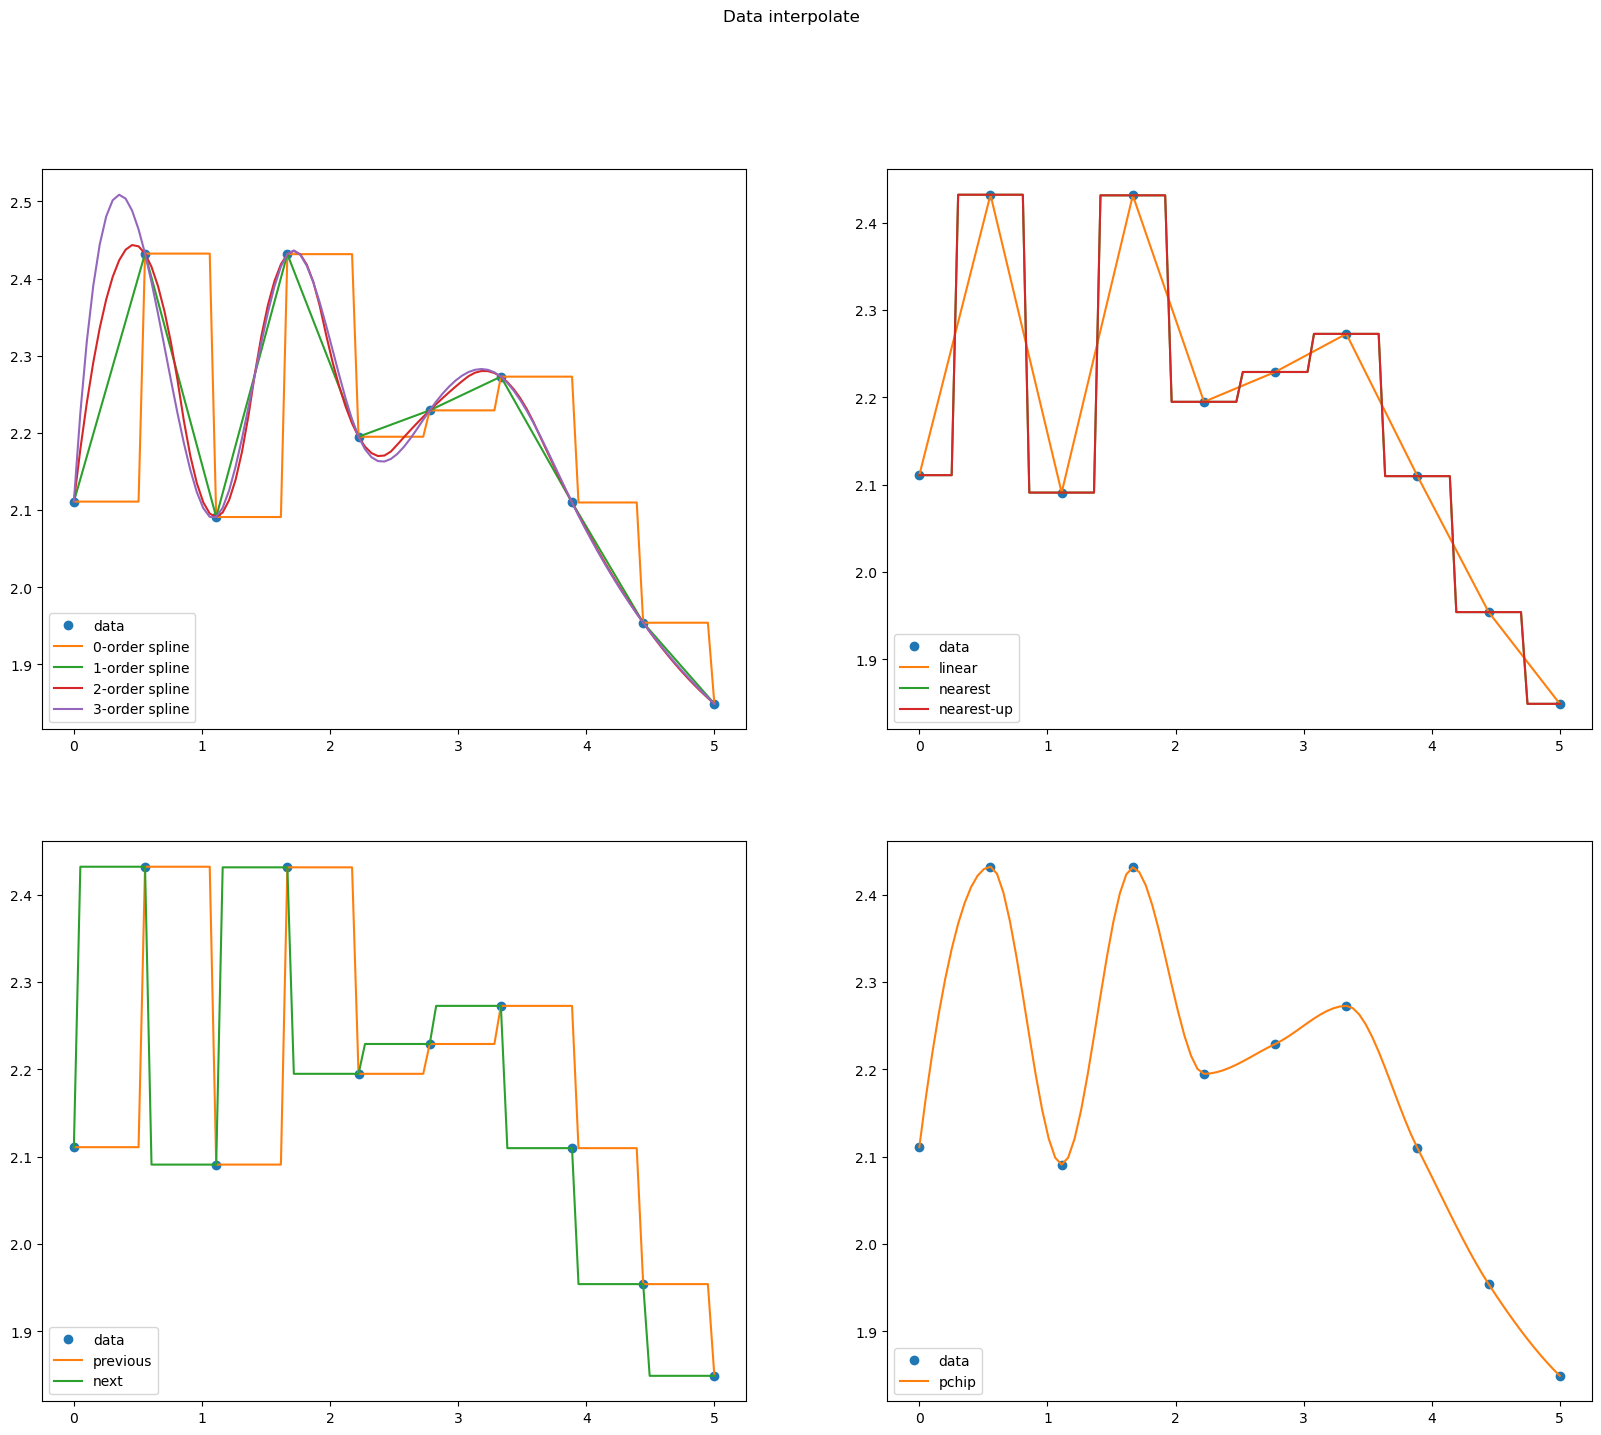

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # 导入 Matplotlib 工具包
from scipy.interpolate import interp1d  # 导入 scipy 中的一维插值工具 interp1d
from scipy import interpolate
import scipy

# 生成已知数据点集 (x,y)，需插值的数据点集 xnew
np.random.seed(5)
x = np.linspace(0, 5, 10)  # 生成已知数据点集的 x
y = np.cos(x / 10) * 2 + 0.5 * np.random.rand(10)  # 生成已知数据点集的 y
xnew = np.linspace(0, 5, 100)  # 指定需插值的数据点集 xnew

# 使用不同插值方法，由给定数据点集 (x,y) 求插值函数 fx
f1 = interp1d(x, y, kind="linear")  # 线性插值
f2 = interp1d(x, y, kind="zero")  # 零阶样条插值
f3 = interp1d(x, y, kind="slinear")  # 一次样条插值
f4 = interp1d(x, y, kind="quadratic")  # 二次样条插值
f5 = interp1d(x, y, kind="cubic")  # 三次样条插值
f6 = interp1d(x, y, kind="nearest")  # 临近点插值，向下舍入
f7 = interp1d(x, y, kind="nearest-up")  # 临近点插值，向上舍入
f8 = interp1d(x, y, kind="previous")  # 前点插值
f9 = interp1d(x, y, kind="next")  # 后点插值

f10 = interpolate.PchipInterpolator(x, y)  # 分段三次Hermite插值

# 绘图
plt.figure(figsize=(20, 16))
plt.suptitle("Data interpolate")  # 全局标题
plt.subplot(221)
plt.plot(x, y, "o", label="data")
plt.plot(xnew, f2(xnew), label="0-order spline")  # 零阶样条插值
plt.plot(xnew, f3(xnew), label="1-order spline")  # 一阶样条插值
plt.plot(xnew, f4(xnew), label="2-order spline")  # 二阶样条插值
plt.plot(xnew, f5(xnew), label="3-order spline")  # 三阶样条插值
plt.legend(loc="lower left")
plt.subplot(222)
plt.plot(x, y, "o", label="data")
plt.plot(xnew, f1(xnew), label="linear")  # 线性插值
plt.plot(xnew, f6(xnew), label="nearest")  # 临近点插值，向下舍入
plt.plot(xnew, f7(xnew), label="nearest-up")  # 临近点插值，向上舍入
plt.legend(loc="lower left")
plt.subplot(223)
plt.plot(x, y, "o", label="data")
plt.plot(xnew, f8(xnew), label="previous")  # 前点插值
plt.plot(xnew, f9(xnew), label="next")  # 后点插值
plt.legend(loc="lower left")
plt.subplot(224)
plt.plot(x, y, "o", label="data")
plt.plot(xnew, f10(xnew), label="pchip")  # 前点插值
plt.legend(loc="lower left")
plt.show()


shape of original dataset:
	xx:(20, 30),yy:(20, 30),z:(20, 30)
	x:(30,),y:(20,),z:(20, 30)
shape of interpolation dataset:
	xnew:(120,),ynew:(80,),znew:(80, 120)


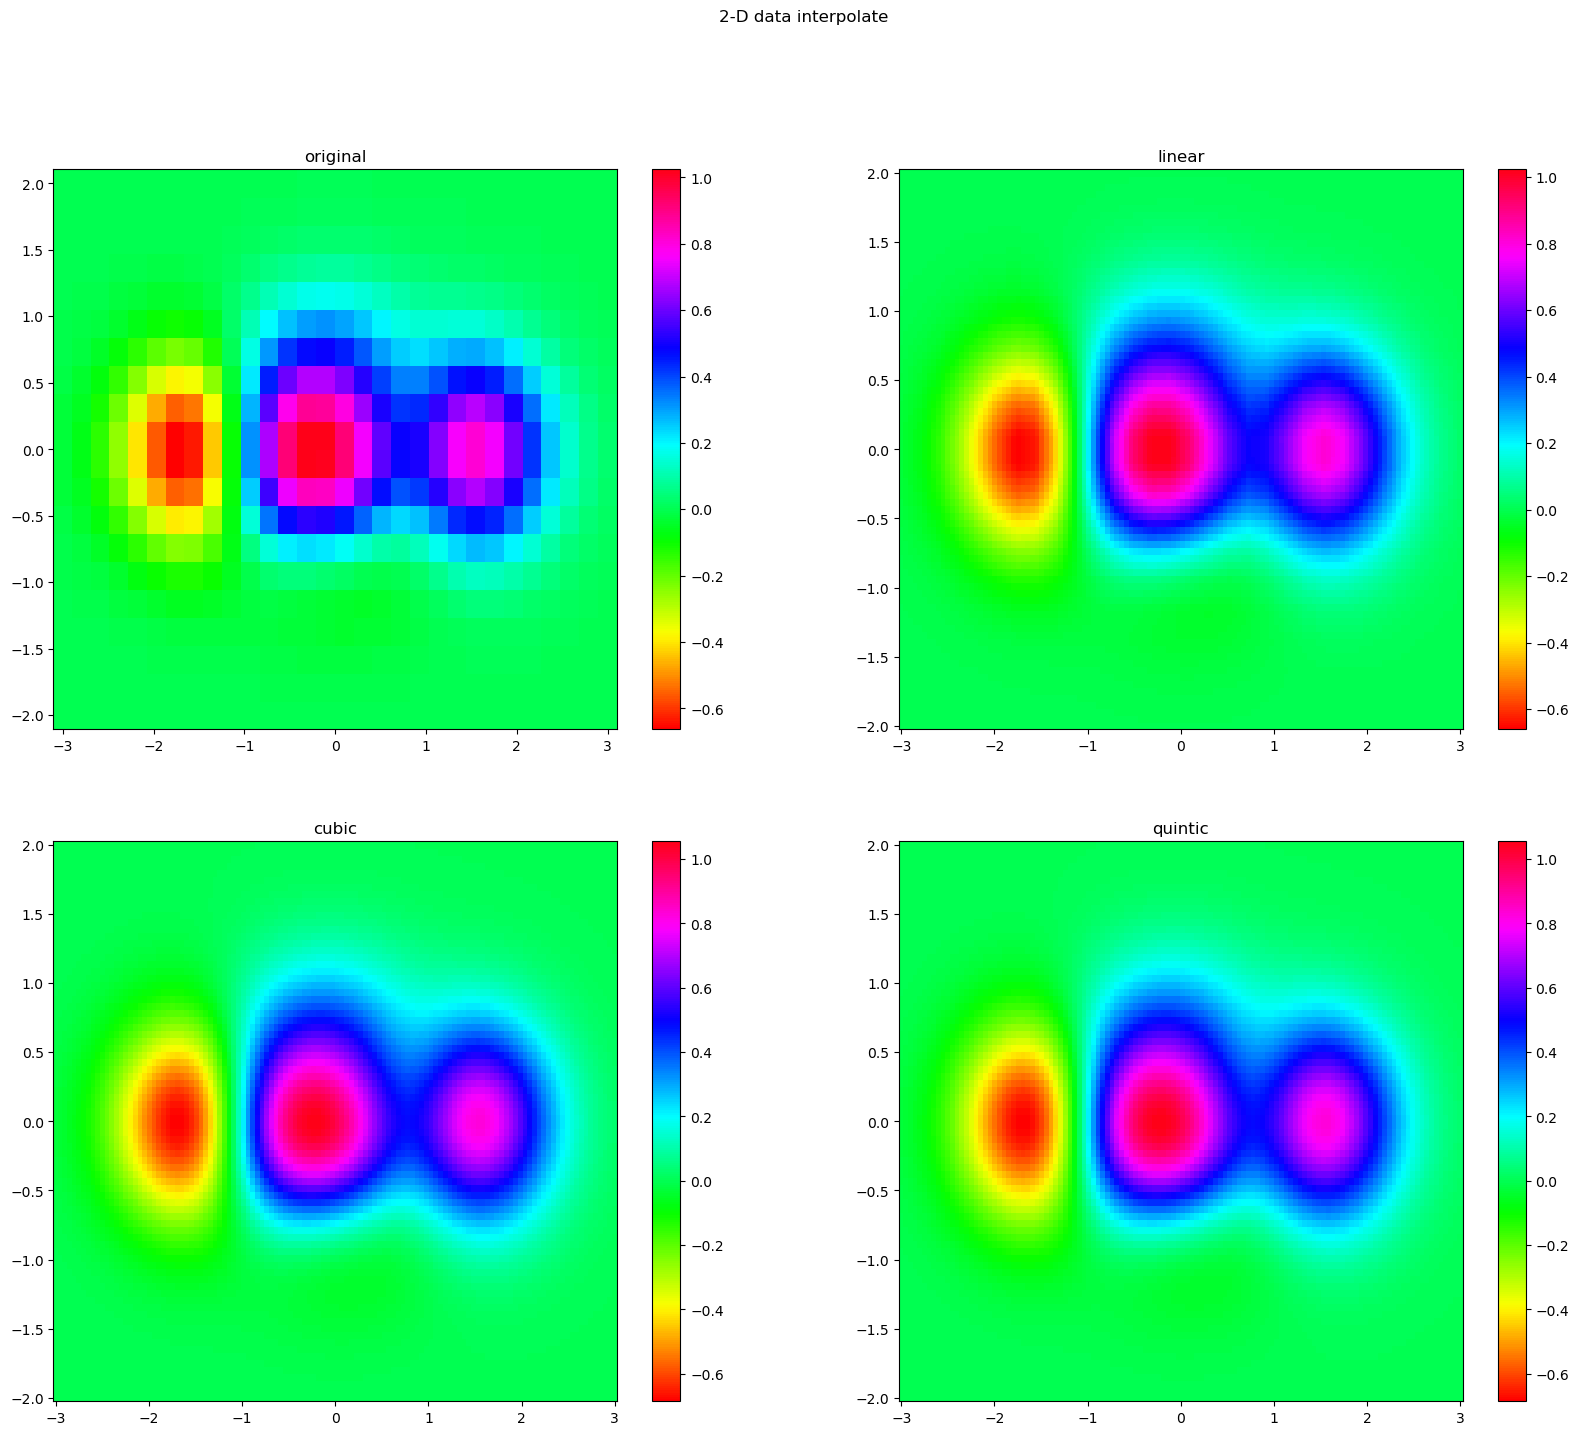

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d  # 导入 scipy 中的二维插值工具 interp2d

# 生成已知数据网格点集 (xx,yy,z)
yy, xx = np.mgrid[-2:2:20j, -3:3:30j]  # 生成网格点 30x20 = 600
z = (1 - 0.5 * xx + xx ** 5 + yy ** 3) * np.exp(-xx ** 2 - 2 * yy ** 2)  # 计算网格点的值 z
x, y = xx[0, :], yy[:, 0]  # 由数据网格点 xx,yy 转换一维数组 x, y
print("shape of original dataset:\n\txx:{},yy:{},z:{}".format(xx.shape, yy.shape, z.shape))
print("\tx:{},y:{},z:{}".format(x.shape, y.shape, z.shape))

# 由给定数据点集 (x,y,z) 求插值函数 fInterp： x,y 是一维数组，z 是 len(x)*len(y) 二维数组
f1 = interp2d(x, y, z, kind='linear')  # 线性插值
f2 = interp2d(x, y, z, kind='cubic')  # 三阶样条插值
f3 = interp2d(x, y, z, kind='quintic')  # 五阶样条插值

# 由插值函数 fInterp 计算需插值的网格点集 ynew,xnew 的函数值
xnew = np.linspace(-3, 3, 120)  # xnew 是一维数组
ynew = np.linspace(-2, 2, 80)  # ynew 是一维数组
z1 = f1(xnew, ynew)  # 根据线性插值函数 f1 计算需插值的网格点集的函数值
z2 = f2(xnew, ynew)  # 根据三阶样条插值函数 f2 计算需插值的网格点集的函数值
z3 = f3(xnew, ynew)  # 根据五阶样条插值函数 f3 计算需插值的网格点集的函数值
print("shape of interpolation dataset:\n\txnew:{},ynew:{},znew:{}".format(xnew.shape, ynew.shape, z1.shape))

# 绘图
plt.figure(figsize=(20, 16))
plt.suptitle("2-D data interpolate")  # 全局标题
plt.subplot(221)
plt.pcolor(xx, yy, z, cmap=plt.cm.hsv, shading='auto')
plt.title("original")
plt.colorbar()
plt.subplot(222)
plt.pcolor(xnew, ynew, z1, cmap=plt.cm.hsv, shading='auto')
plt.title("linear")
plt.colorbar()
plt.subplot(223)
plt.pcolor(xnew, ynew, z2, cmap=plt.cm.hsv, shading='auto')
plt.title("cubic")
plt.colorbar()
plt.subplot(224)
plt.pcolor(xnew, ynew, z3, cmap=plt.cm.hsv, shading='auto')
plt.title("quintic")
plt.colorbar()
plt.show()


#### 外插值  
插值点落在已知数据集的外部

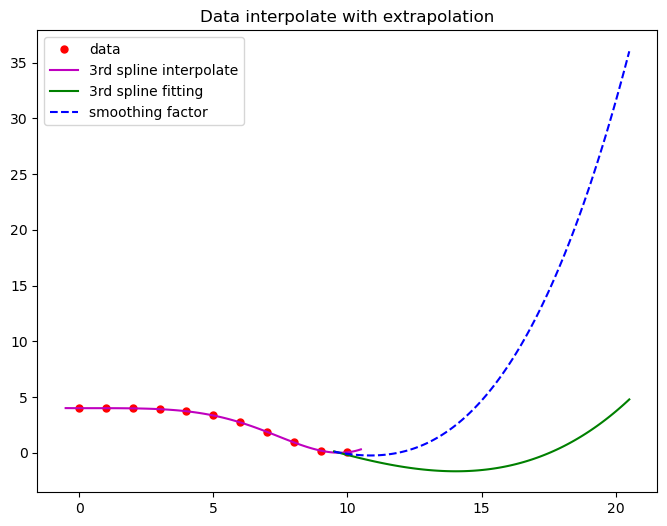

In [1]:
# 3. 一维插值方法(外插)
import numpy as np
import matplotlib.pyplot as plt  # 导入 Matplotlib 工具包
from scipy.interpolate import UnivariateSpline  # 导入 scipy 中的一维插值工具 UnivariateSpline

# 生成已知数据点集 (x,y)，需插值的数据点集 xnew
x = np.linspace(0, 10, 11)  # 生成已知数据点集的 x
y = np.cos((x) ** 2 / 30) * 2 + 2  # 生成已知数据点集的 y
xnew = np.linspace(-0.5, 10.5, 110)  # 指定需插值的数据点集 xnew

# 使用 UnivariateSpline 插值工具，由给定数据点集 (x,y) 求插值函数 fSpl
fSpl1 = UnivariateSpline(x, y, s=0)  # 三次样条插值，s=0：插值函数经过所有数据点
y1 = fSpl1(xnew)  # 由插值函数 fSpl1 计算插值点的函数值 y1

fSpl2 = UnivariateSpline(x, y)  # 三次样条插值，默认 s= len(w)
y2 = fSpl2(xnew + 10)  # 由插值函数 fSpl2 计算插值点的函数值 y2

fSpl2.set_smoothing_factor(0.1)  # 设置光滑因子 sf
y3 = fSpl2(xnew + 10)  # 由插值函数 fSpl2(sf=0.1) 计算插值点的函数值 y3

# 绘图
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x, y, 'ro', ms=5, label="data")
plt.plot(xnew, y1, 'm', label="3rd spline interpolate")
plt.plot(xnew + 10, y2, 'g', label="3rd spline fitting")
plt.plot(xnew + 10, y3, 'b--', label="smoothing factor")
ax.set_title("Data interpolate with extrapolation")
plt.legend(loc="best")
plt.show()
